# **Image Classification on fashion mnist dataset**

In [ ]:
# importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from keras import layers

In [ ]:
# loading the data

fashion_mnist = tf.keras.datasets.fashion_mnist

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
along with a test set of 10,000 images. This dataset can be used as
a drop-in replacement for MNIST.

The classes are:

| Label | Description |
|:-----:|-------------|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |

Returns:

Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

**`x_train`**: `uint8` NumPy array of grayscale image data with shapes
  `(60000, 28, 28)`, containing the training data.

**`y_train`**: `uint8` NumPy array of labels (integers in range 0-9)
  with shape `(60000,)` for the training data.

**`x_test`**: `uint8` NumPy array of grayscale image data with shapes
  (10000, 28, 28), containing the test data.

**`y_test`**: `uint8` NumPy array of labels (integers in range 0-9)
  with shape `(10000,)` for the test data.


In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
# observing the data shapes

print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000,)


In [ ]:
# data types

x_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [ ]:
# creating a validation data

x_valid, x_train_scaled = x_train[:4000]/255, x_train[4000:]/255
y_valid, y_train = y_train[:4000], y_train[4000:]

In [ ]:
x_test_scaled = x_test/255

x_train = x_train[4000:]

In [ ]:
tags = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

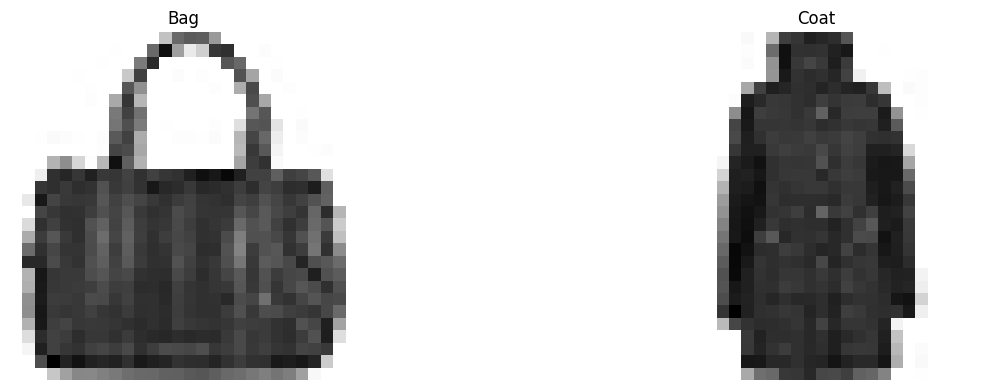

In [ ]:
# viewing the data
plt.figure(figsize=(15, 4))

for i in range(2):
  ax = plt.subplot(1, 2, i+1)
  plt.imshow(x_train[i], cmap = 'binary')
  plt.axis('off')
  plt.title(tags[y_train[i]])

plt.tight_layout()
plt.show()

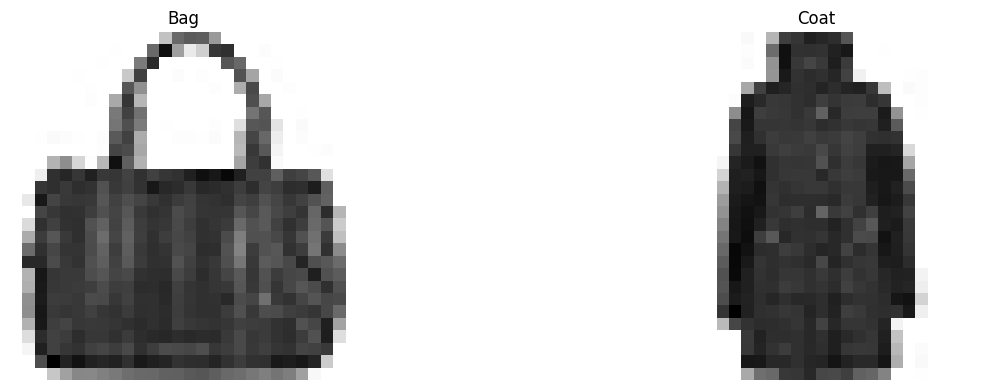

In [ ]:
# observing the scaled data

plt.figure(figsize=(15, 4))

for i in range(2):
  ax = plt.subplot(1, 2, i+1)
  plt.imshow(x_train[i]/255, cmap = 'binary')
  plt.axis('off')
  plt.title(tags[y_train[i]])

plt.tight_layout()
plt.show()

We are not finding any difference

But scaling is necessary for be input to a model

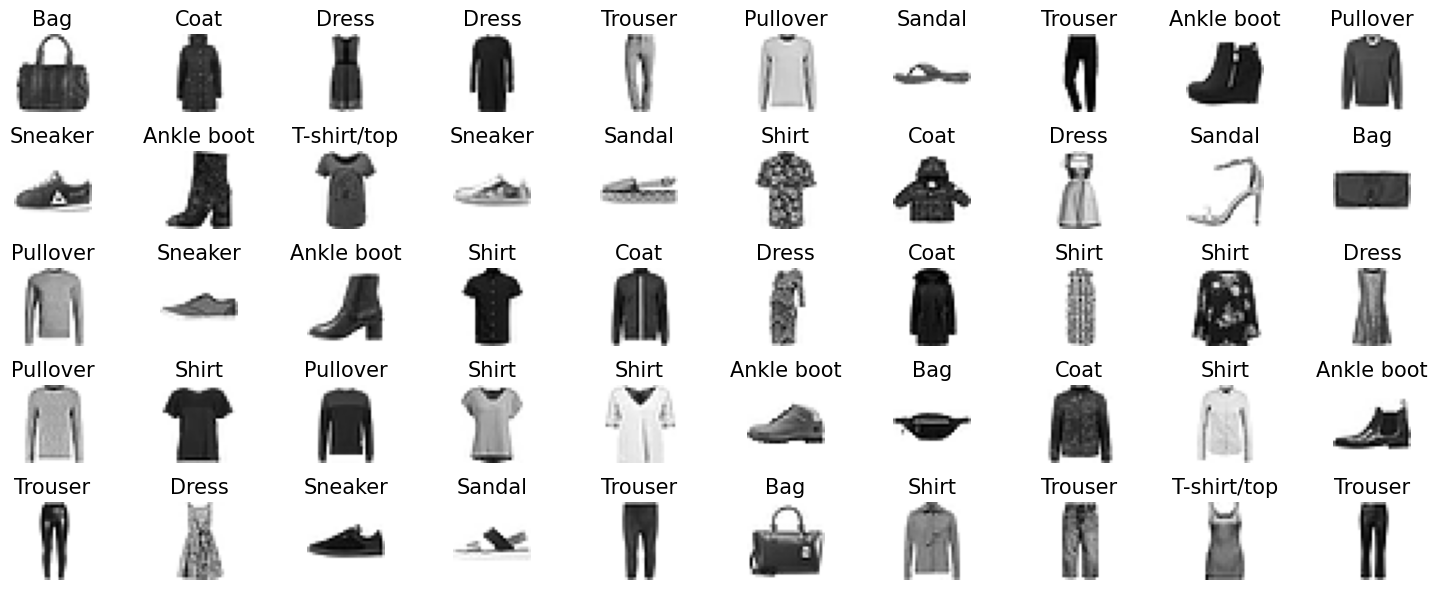

In [ ]:
plt.figure(figsize = (15, 6))

for i in range(50):
  ax = plt.subplot(5, 10, i+1)
  plt.imshow(x_train[i], cmap = 'binary')
  plt.axis('off')
  plt.title(tags[y_train[i]], fontsize=15)

plt.tight_layout()
plt.show()

For input to a Ann

* The image data should be flattened, then only the Ann can be worked
* The image shouldn't be as grid data

In [ ]:
# model building

model = keras.Sequential([
    keras.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name='accuracy')]
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# model training

history = model.fit(
    x_train_scaled, y_train,
    validation_data=(x_valid, y_valid),
    epochs = 50
)

Epoch 1/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7370 - loss: 0.7394 - val_accuracy: 0.8500 - val_loss: 0.4112
Epoch 2/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8396 - loss: 0.4465 - val_accuracy: 0.8652 - val_loss: 0.3735
Epoch 3/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8531 - loss: 0.4050 - val_accuracy: 0.8695 - val_loss: 0.3597
Epoch 4/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8583 - loss: 0.3816 - val_accuracy: 0.8745 - val_loss: 0.3504
Epoch 5/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8658 - loss: 0.3659 - val_accuracy: 0.8785 - val_loss: 0.3238
Epoch 6/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8720 - loss: 0.3513 - val_accuracy: 0.8745 - val_loss: 0.3372
Epoch 7/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8734 - loss: 0.3432 - val_accuracy: 0.8715 - val_loss: 0.3329
Epoch 8/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8763 - loss: 0.3

We can observe that
* the Ann model learns hardly the given image data.
* After 50 epochs of training, it hardly reaches to 92% accuracy

In [ ]:
# evalution metrics

test_loss, test_acc = model.evaluate(x_test_scaled, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Test Loss: 0.3477
Test Accuracy: 0.8896


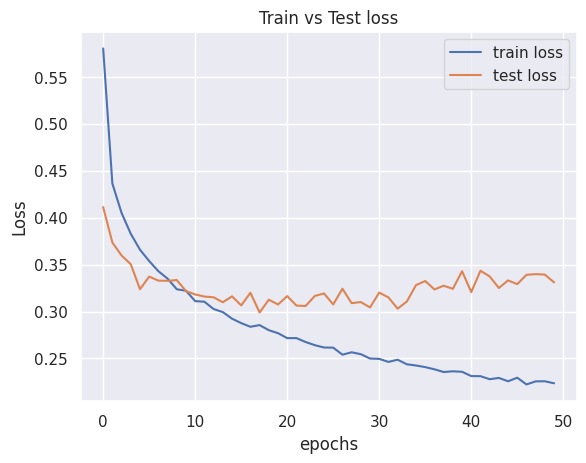

In [ ]:
# loss graphs

sns.set_theme(style='darkgrid')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title("Train vs Test loss")
plt.legend()
plt.show()

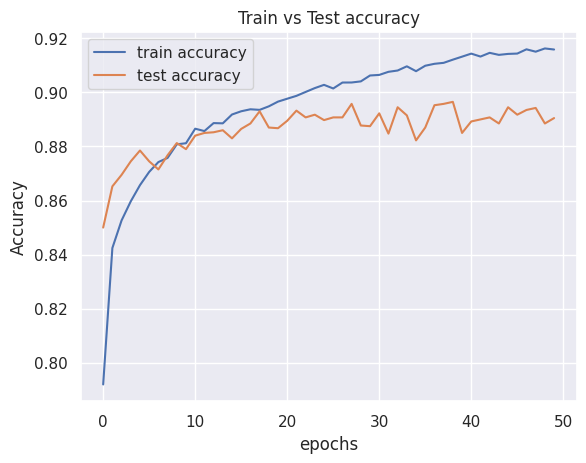

In [ ]:
# Accuracy graphs

sns.set_theme(style='darkgrid')
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title("Train vs Test accuracy")
plt.legend()
plt.show()

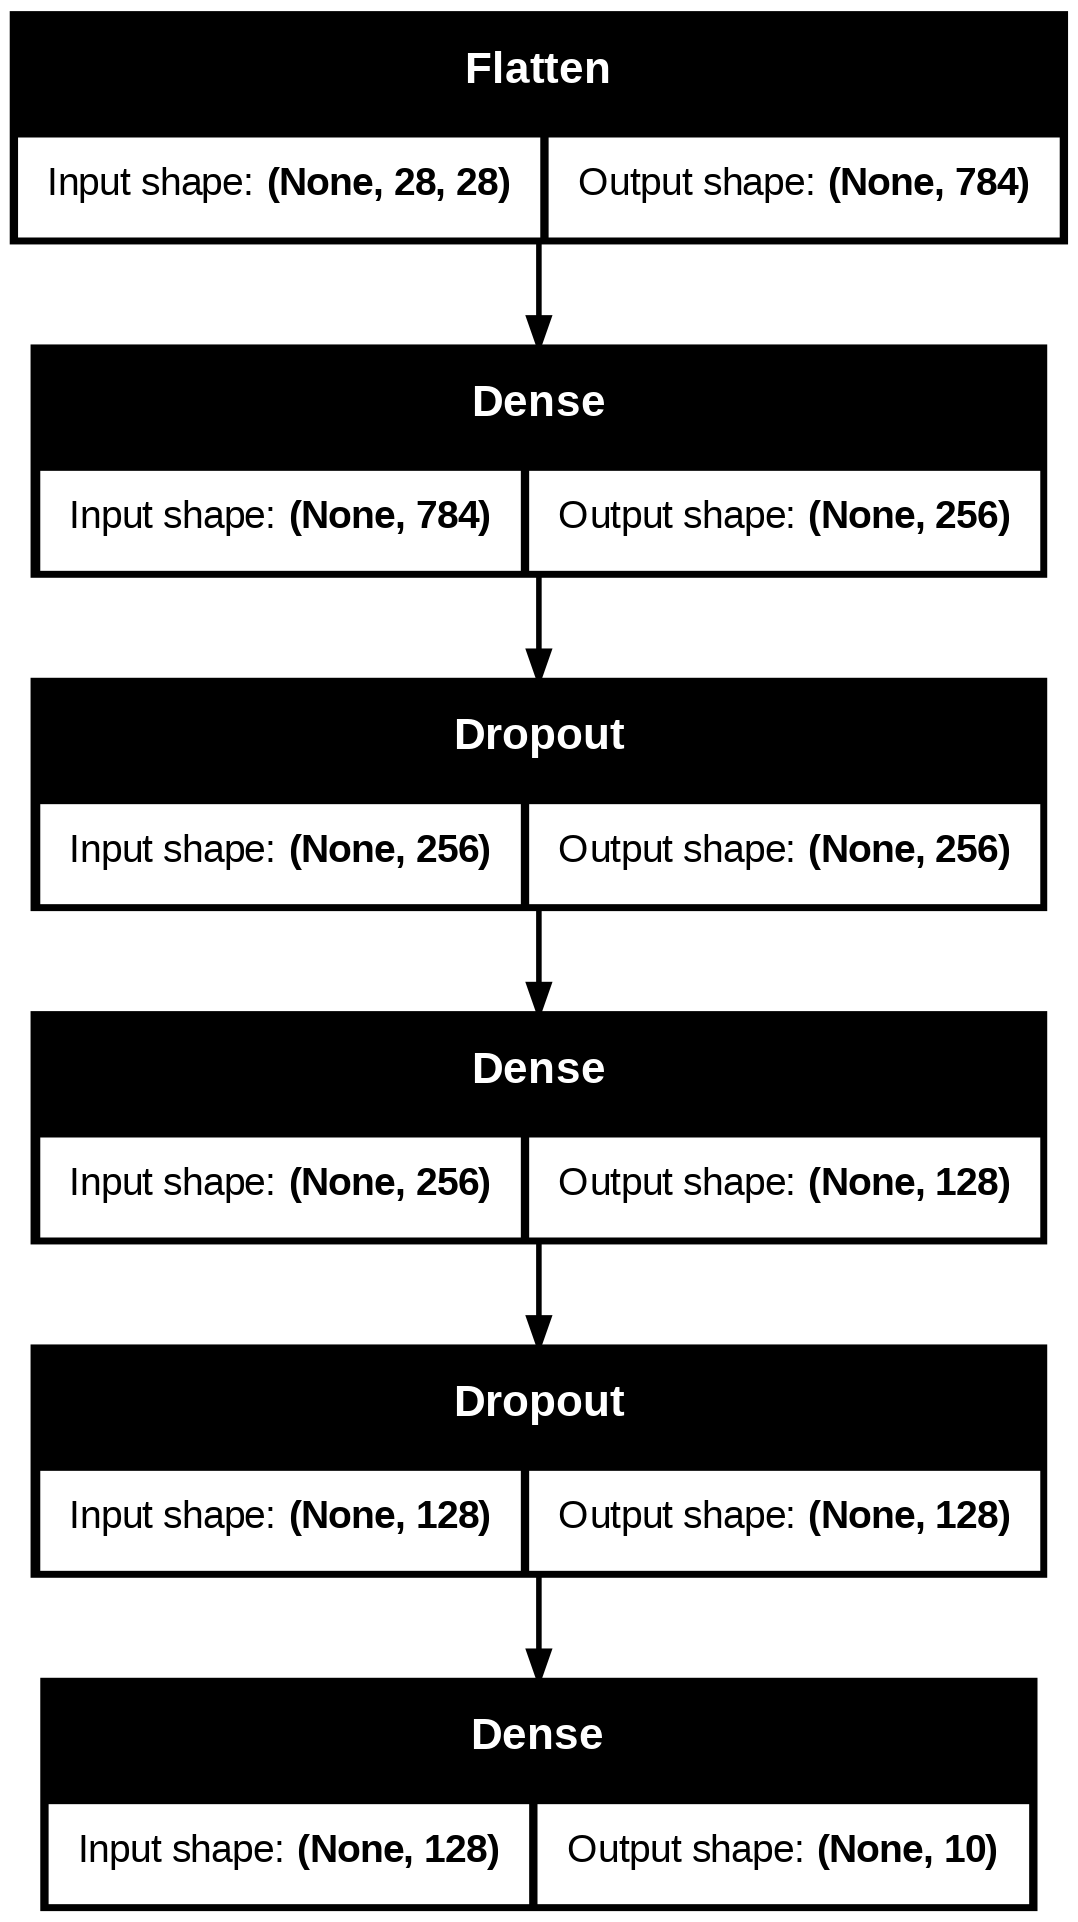

<Figure size 400x1000 with 0 Axes>

In [ ]:
# model plotting

from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


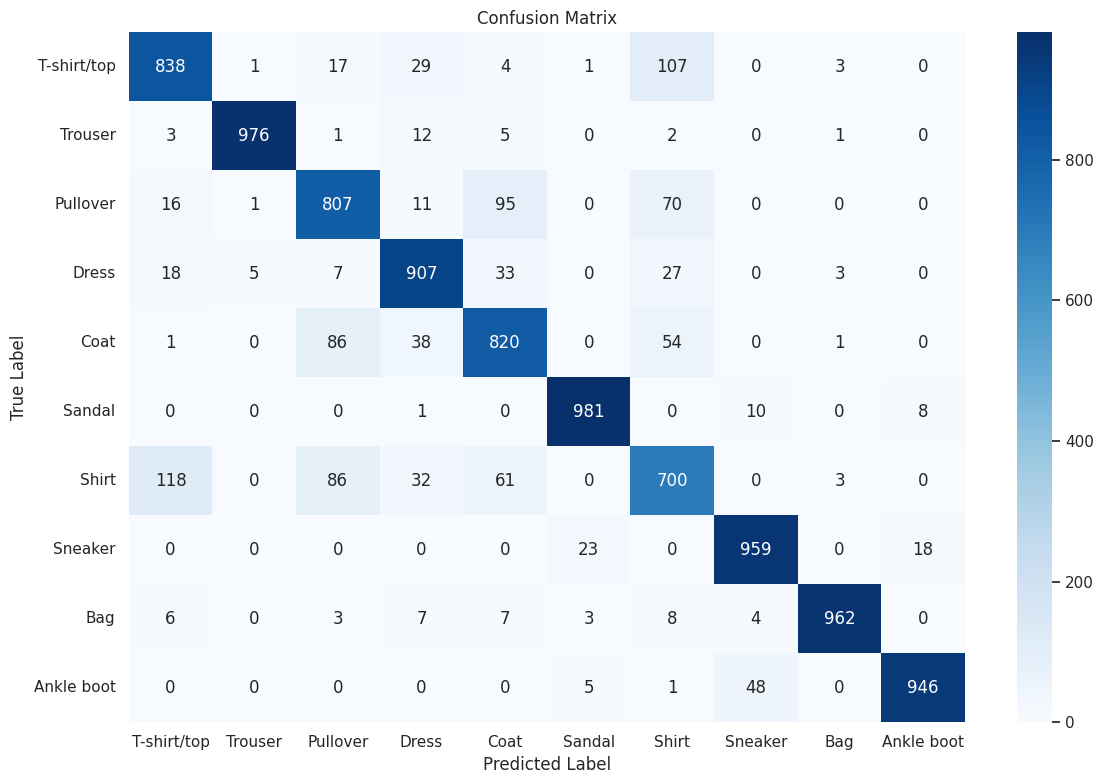

In [ ]:
# confution matrix

from sklearn.metrics import confusion_matrix

probs = model.predict(x_test_scaled)
y_pred = np.argmax(probs, axis = 1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=tags,
            yticklabels=tags
            )
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

We can observe the more misclassifications